In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [46]:
df = pd.read_csv('../data/USAverage_Energy_CO2_1970to2021.csv')

In [47]:
df.head()

,Year,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
0,1970,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333
1,1971,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098
2,1972,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275
3,1973,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216
4,1974,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196


In [48]:
df.set_index("Year", inplace=True)

In [49]:
df.head()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
Year,,,,,,
1970,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333
1971,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098
1972,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275
1973,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216
1974,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196


In [50]:
df.columns = df.columns.str.lower()

In [51]:
df.columns = df.columns.str.replace("_value","")

In [52]:
df.columns = df.columns.str.replace("_energy","")

In [53]:
df.head()

,co2,coal,natural_gas,nuclear,petroleum,renewable
Year,,,,,,
1970,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333
1971,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098
1972,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275
1973,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216
1974,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196


In [54]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

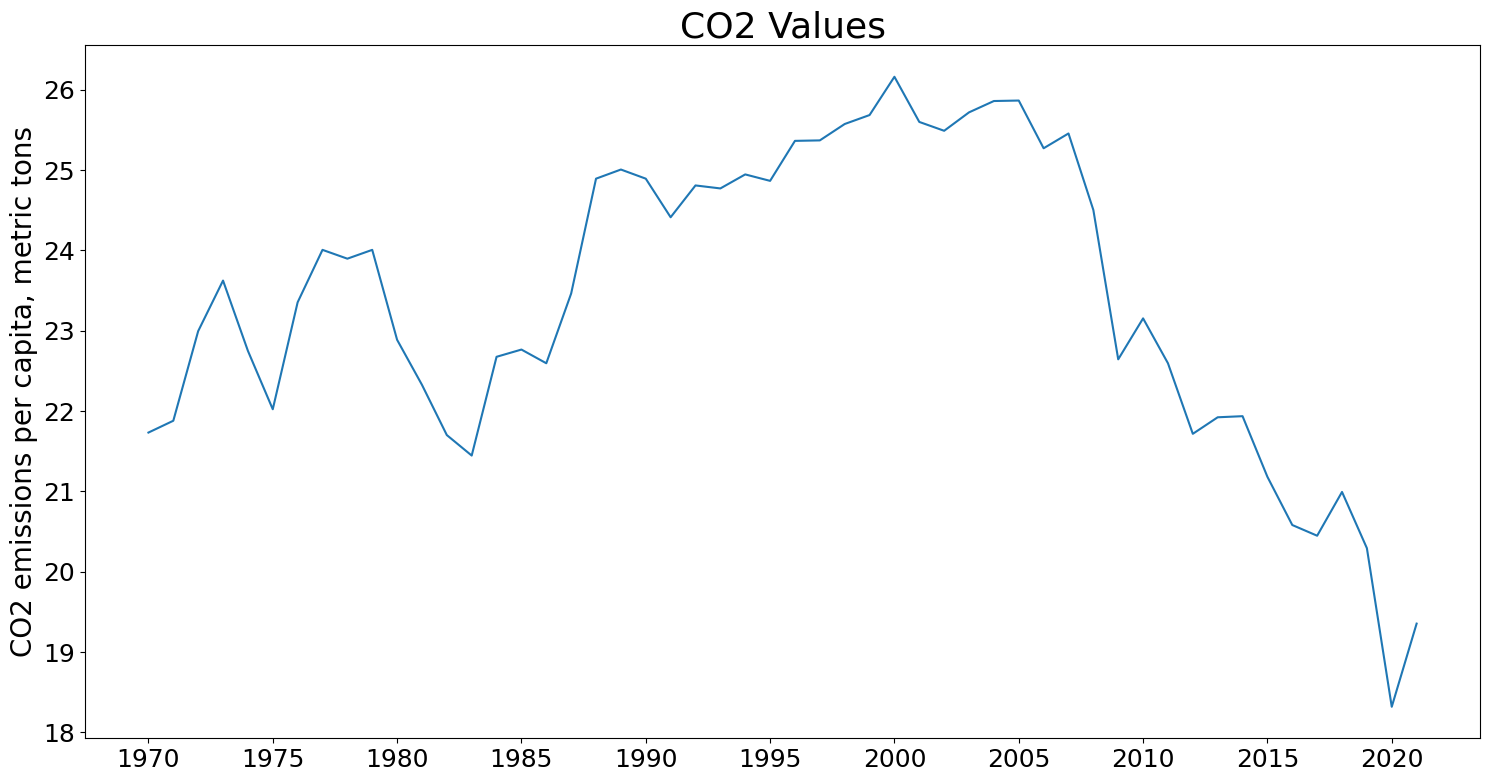

In [71]:
plot_series(df, ['co2'], title="CO2 Values", ylab="CO2 emissions per capita, metric tons",  steps=5);

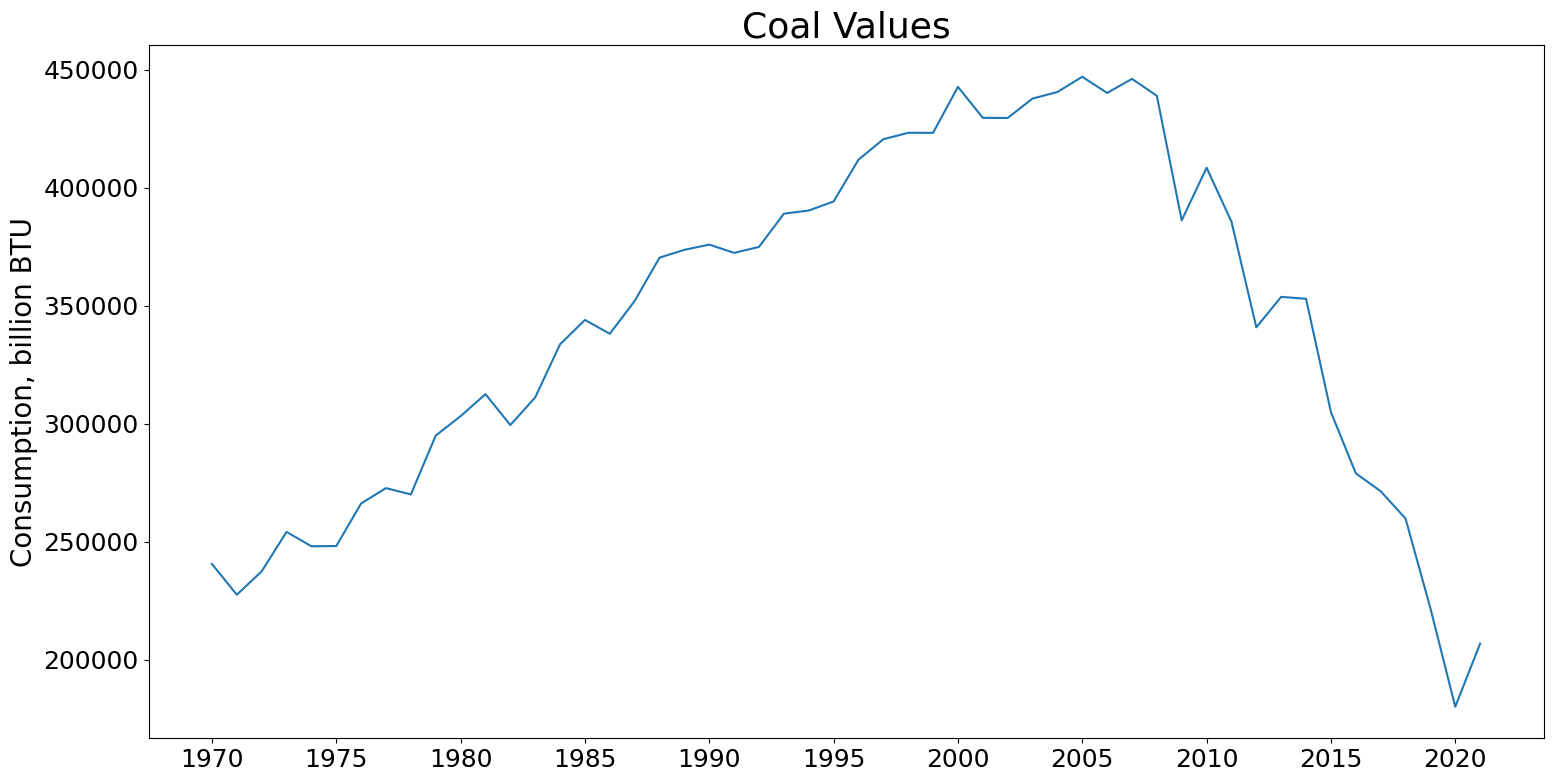

In [65]:
plot_series(df, ['coal'], title="Coal Values", ylab="Consumption, billion BTU", steps=5);

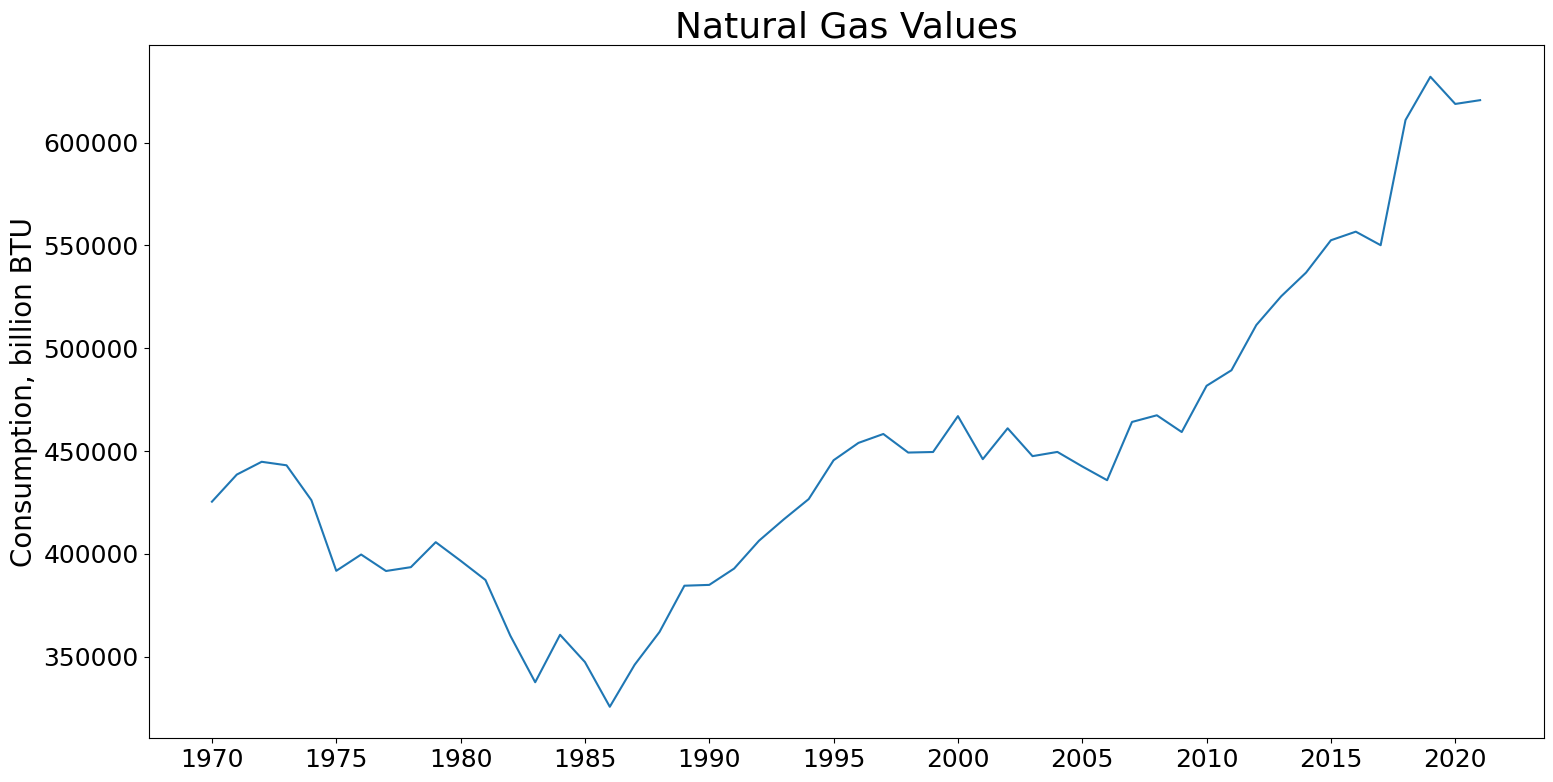

In [66]:
plot_series(df, ['natural_gas'], title="Natural Gas Values", ylab="Consumption, billion BTU", steps=5);

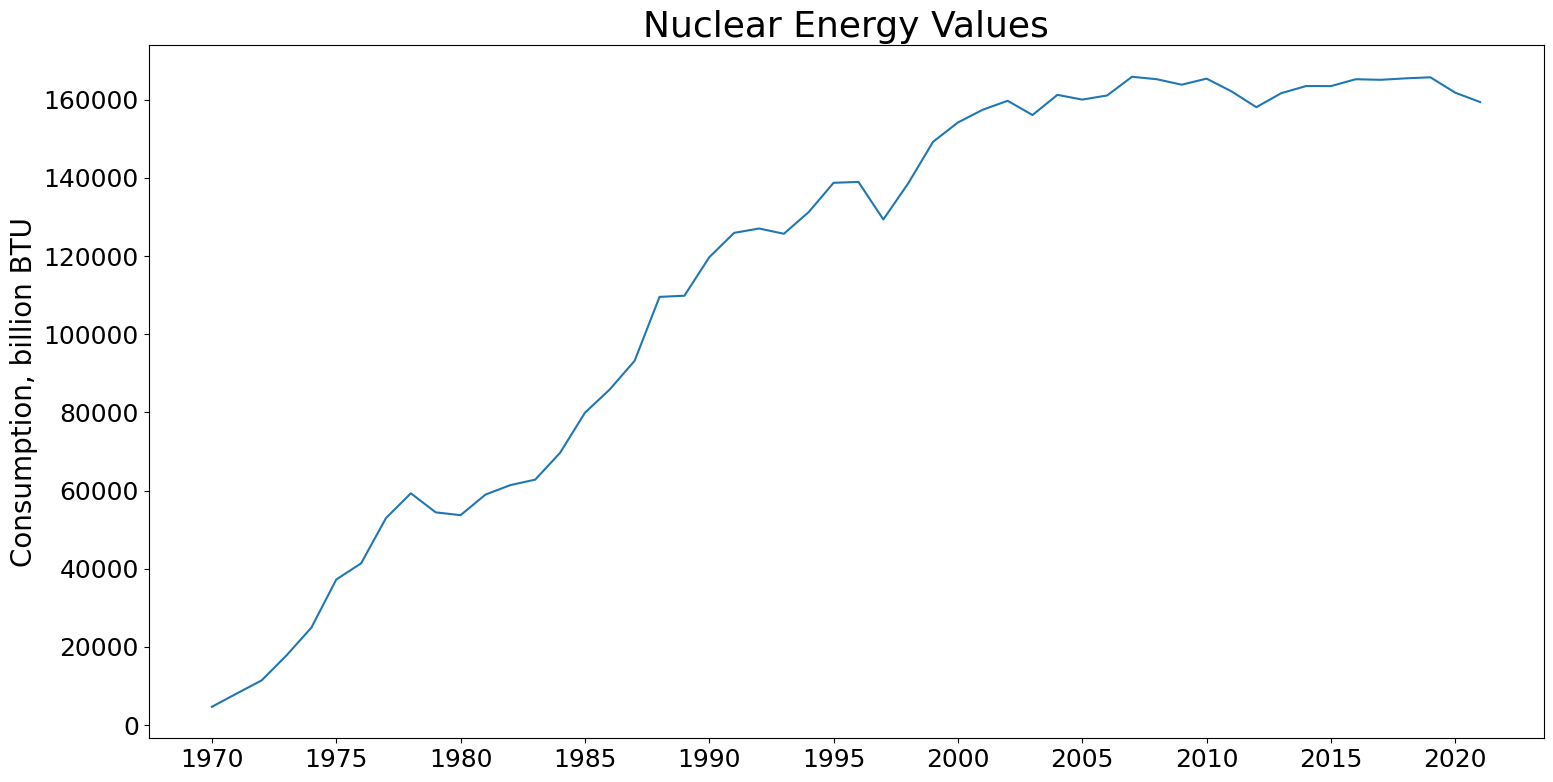

In [67]:
plot_series(df, ['nuclear'], title="Nuclear Energy Values", ylab="Consumption, billion BTU", steps=5);

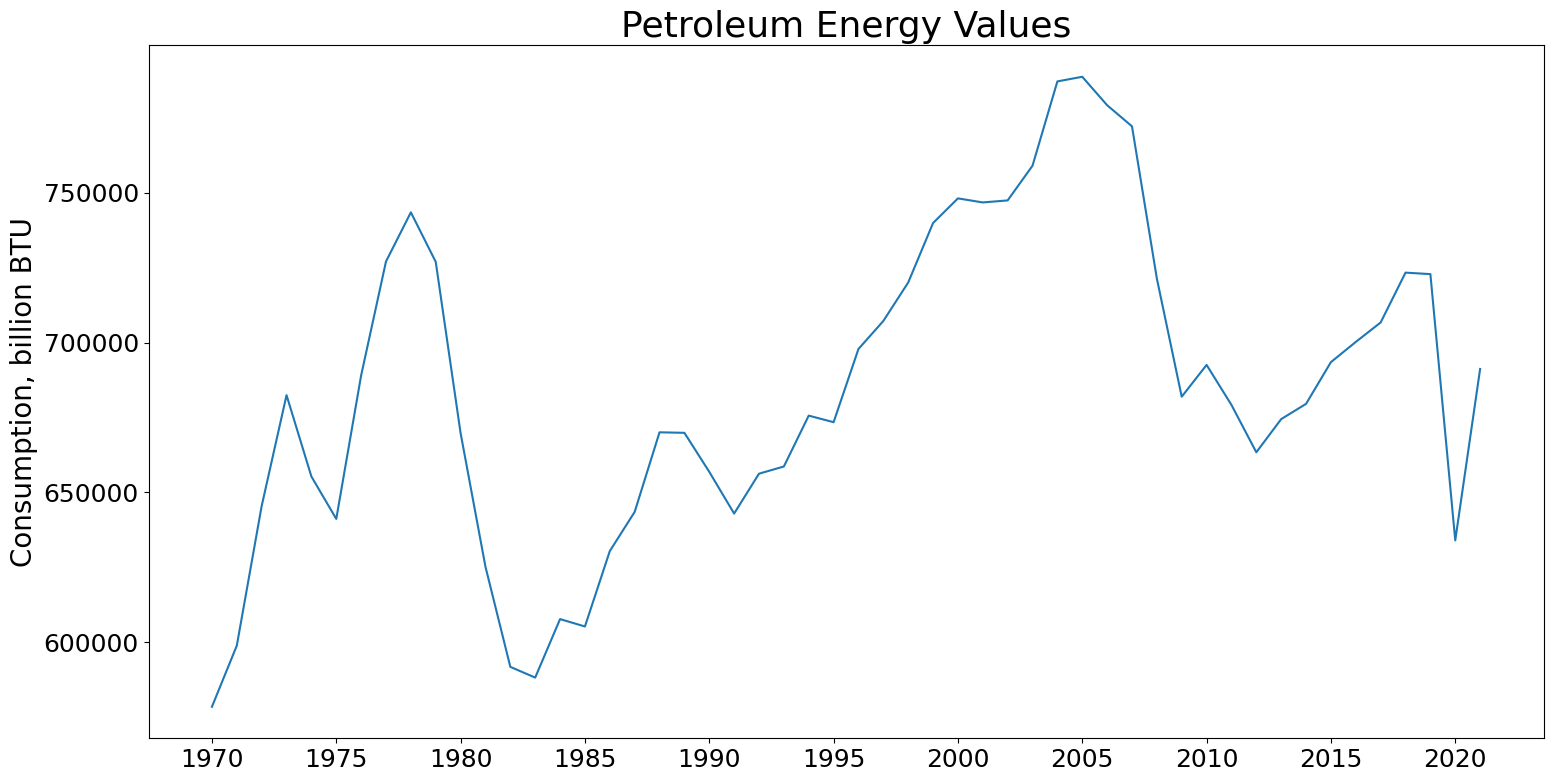

In [68]:
plot_series(df, ['petroleum'], title="Petroleum Energy Values", ylab="Consumption, billion BTU", steps=5);

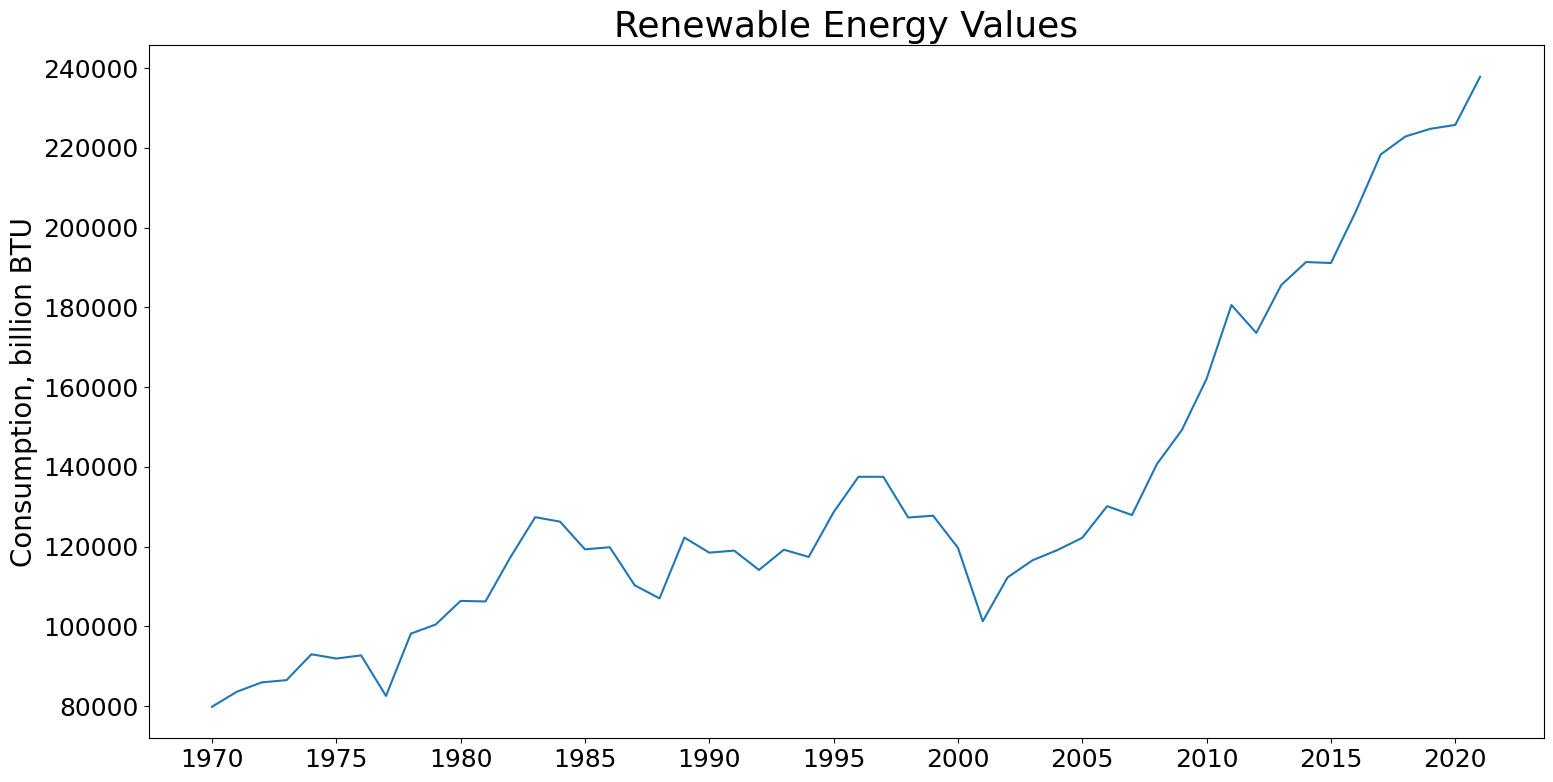

In [69]:
plot_series(df, ['renewable'], title="Renewable Energy Values", ylab="Consumption, billion BTU", steps=5);